In [2]:
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, median_absolute_error

In [3]:
combined=pd.read_csv("C:\\Users\\nairk\\census-by-precincts\\info\\Combined_Tracts3\\Tract_Input_MS2.csv")

In [4]:
len(combined.columns)

188

In [6]:
import matplotlib.pyplot as plt

<Axes: xlabel='Total_Pop'>

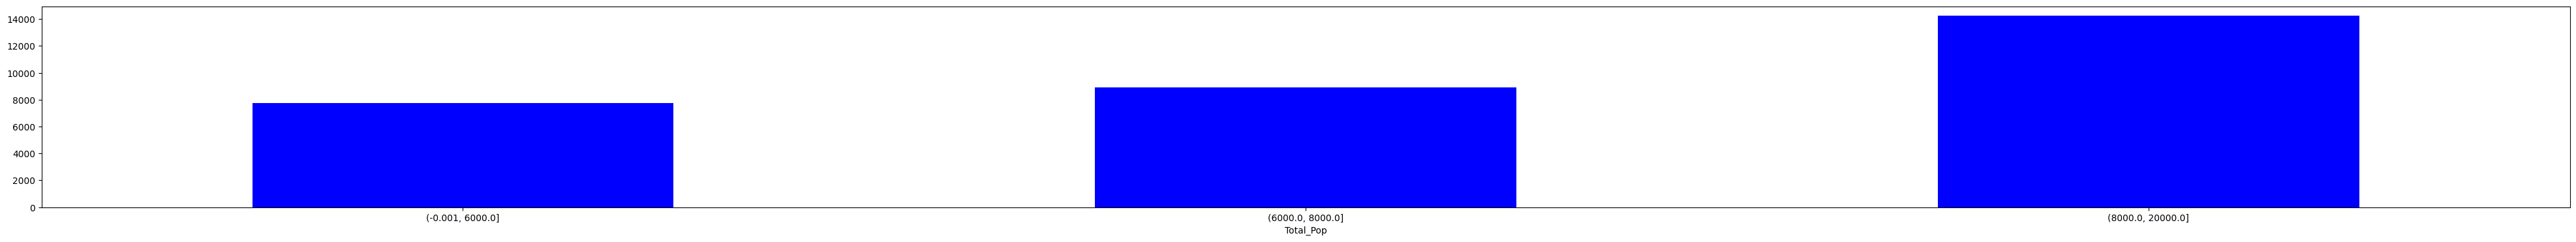

In [150]:
out = pd.cut(combined['Total_Pop'], bins=[0, 6000, 8000,  20000], include_lowest=True)
out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(50,4))


<Axes: ylabel='Frequency'>

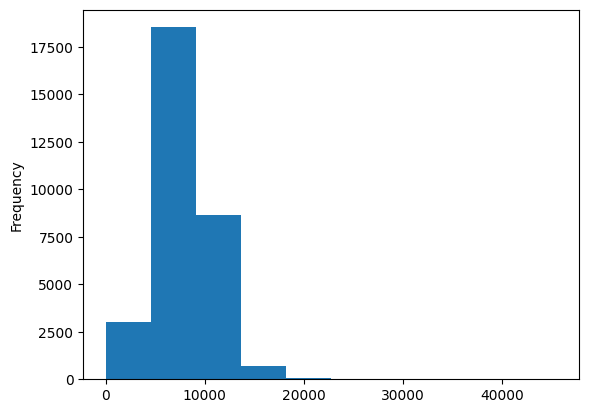

In [4]:
combined['Total_Pop'].plot(kind='hist')

In [7]:
combined=combined.drop(columns=["Combined_Name"])

In [8]:
target=combined.Target

In [9]:
combined=combined.drop(columns=["Target"])

In [233]:
#combined=combined.drop(columns=["Aeroway_1","Barrier-Linear_1",
"Barrier-Highway Access Control_1",
"Barrier-undefined_1",
"Barrier-Other_1","Geological_1",
"Historic_1","Man_Made_1",
"Military_1",
"Natural-Vegetation_1",
"Natural-Geology_1",
"Place-Urban_1",
"Place-Rural_1","Sport_1","Motorway_1",
"Trunk_1",
"Primary_1",
"Secondary_1",
"Tertiary_1",
"Unclassified Highway_1",
"Residential Highway_1",
"Special Roads_1",
"Unknown Roads_1",
"Paths_1",
"Waterway-Natural_1",
"Waterway-Man Made_1",
"Waterway-Facilities_1",
"Waterway-Barriers_1",
"Waterway-Other_1",
"Aerialway_1",
"Railway_Tracks_1",
"Aeroway_2","Barrier-Linear_2",
"Barrier-Highway Access Control_2",
"Barrier-undefined_2",
"Barrier-Other_2","Geological_2",
"Historic_2","Man_Made_2",
"Military_2",
"Natural-Vegetation_2",
"Natural-Geology_2","Place-Urban_2",
"Place-Rural_2","Sport_2","Motorway_2",
"Trunk_2",
"Primary_2",
"Secondary_2",
"Tertiary_2",
"Unclassified Highway_2",
"Residential Highway_2",
"Special Roads_2",
"Unknown Roads_2",
"Paths_2",
"Waterway-Natural_2",
"Waterway-Man Made_2",
"Waterway-Facilities_2",
"Waterway-Barriers_2",
"Waterway-Other_2",
"Aerialway_2",
"Railway_Tracks_2",
"Total_Pop",
"Urban",
"Rural",
"Occupied_Housing",
"Vacant_Housing",
"One_Housing",
"Two_Housing",
"Three_Housing",
"Four_Housing",
"Five_Housing",
"Six_Housing",
"Seven_Plus_Housing",])

In [10]:
combined.columns

Index(['Aeroway_1', 'Amenity-Substance_1', 'Amenity-Education_1',
       'Amenity-Transportation_1', 'Amenity-Financial_1',
       'Amenity-Healthcare_1', 'Amenity-Entertainment, Arts, Culture_1',
       'Amenity-Public Service_1', 'Amenity-Facility_1',
       'Amenity-Waste Management_1',
       ...
       'Rural', 'Occupied_Housing', 'Vacant_Housing', 'One_Housing',
       'Two_Housing', 'Three_Housing', 'Four_Housing', 'Five_Housing',
       'Six_Housing', 'Seven_Plus_Housing'],
      dtype='object', length=186)

In [4]:
for i in combined.columns:
    print("\""+i+"\",")

"Aeroway_1",
"Amenity-Substance_1",
"Amenity-Education_1",
"Amenity-Transportation_1",
"Amenity-Financial_1",
"Amenity-Healthcare_1",
"Amenity-Entertainment, Arts, Culture_1",
"Amenity-Public Service_1",
"Amenity-Facility_1",
"Amenity-Waste Management_1",
"Amenity-Other_1",
"Barrier-Linear_1",
"Barrier-Highway Access Control_1",
"Barrier-undefined_1",
"Barrier-Other_1",
"Building-Accomodation_1",
"Building-Commercial_1",
"Building-Religious_1",
"Building-Civic/amenity_1",
"Building-Agricultural_1",
"Building-Sports_1",
"Building-Storage_1",
"Building-Cars_1",
"Building-Power_1",
"Building-Other_1",
"Building-Total_1",
"Craft_1",
"Geological_1",
"Historic_1",
"Landuse-Developed_1",
"Landuse-Rural_1",
"Landuse-Waterbody_1",
"Landuse-Other_1",
"Leisure_1",
"Man_Made_1",
"Military_1",
"Natural-Vegetation_1",
"Natural-Geology_1",
"Office_1",
"Place-Urban_1",
"Place-Rural_1",
"Shop-Food_1",
"Shop-General_1",
"Shop-Clothing_1",
"Shop-Discount_1",
"Shop-Health_1",
"Shop-D.I.Y._1",
"Shop-Furnit

Ignore these cells

In [235]:
combined=combined.drop(columns=["Amenity-Substance_1",
"Amenity-Education_1",
"Amenity-Transportation_1",
"Amenity-Financial_1",
"Amenity-Healthcare_1",
"Amenity-Entertainment, Arts, Culture_1",
"Amenity-Public Service_1",
"Amenity-Facility_1",
"Amenity-Waste Management_1",
"Amenity-Other_1",
"Building-Accomodation_1",
"Building-Commercial_1",
"Building-Religious_1",
"Building-Civic/amenity_1",
"Building-Agricultural_1",
"Building-Sports_1",
"Building-Storage_1",
"Building-Cars_1",
"Building-Power_1",
"Building-Other_1",
"Building-Undefined_1",
"Craft_1",
"Landuse-Developed_1",
"Landuse-Rural_1",
"Landuse-Waterbody_1",
"Landuse-Other_1",
"Leisure_1",
"Office_1",
"Shop-Food_1",
"Shop-General_1",
"Shop-Clothing_1",
"Shop-Discount_1",
"Shop-Health_1",
"Shop-D.I.Y._1",
"Shop-Furniture_1",
"Shop-Electronics_1",
"Shop-Outdoors_1",
"Shop-Hobbies_1",
"Shop-Gifts_1",
"Shop-Other_1",
"Tourism_1",
"Amenity-Substance_2",
"Amenity-Education_2",
"Amenity-Transportation_2",
"Amenity-Financial_2",
"Amenity-Healthcare_2",
"Amenity-Entertainment, Arts, Culture_2",
"Amenity-Public Service_2",
"Amenity-Facility_2",
"Amenity-Waste Management_2",
"Amenity-Other_2",
"Building-Accomodation_2",
"Building-Commercial_2",
"Building-Religious_2",
"Building-Civic/amenity_2",
"Building-Agricultural_2",
"Building-Sports_2",
"Building-Storage_2",
"Building-Cars_2",
"Building-Power_2",
"Building-Other_2",
"Building-Undefined_2",
"Craft_2",
"Landuse-Developed_2",
"Landuse-Rural_2",
"Landuse-Waterbody_2",
"Landuse-Other_2",
"Leisure_2",
"Office_2",
"Shop-Food_2",
"Shop-General_2",
"Shop-Clothing_2",
"Shop-Discount_2",
"Shop-Health_2",
"Shop-D.I.Y._2",
"Shop-Furniture_2",
"Shop-Electronics_2",
"Shop-Outdoors_2",
"Shop-Hobbies_2",
"Shop-Gifts_2",
"Shop-Other_2",
"Tourism_2",
"Total_Area",])

In [364]:
col1=[]
col2=[]
for i in combined.columns:
    if i[:8]=="Building" and i[-1]=="1":
        col1.append(i)
    if i[:8]=="Building" and i[-1]=="2":
        col2.append(i)

In [365]:

#find sum of columns specified 
combined['Buildings_1'] = combined[col1].sum(axis=1)
combined['Buildings_2'] = combined[col2].sum(axis=1)


In [366]:
combined=combined.drop(columns=col1)
combined=combined.drop(columns=col2)

In [21]:
col3=[]
col4=[]
for i in combined.columns:
    if i[:7]=="Amenity" and i[-1]=="1":
        col3.append(i)
    if i[:7]=="Amenity" and i[-1]=="2":
        col4.append(i)

In [22]:
combined['Amenity_1'] = combined[col3].sum(axis=1)
combined['Amenity_2'] = combined[col4].sum(axis=1)

In [23]:
combined=combined.drop(columns=col3)
combined=combined.drop(columns=col4)

In [361]:
col5=[]
col6=[]
for i in combined.columns:
    if i[:4]=="Shop" and i[-1]=="1":
        col5.append(i)
    if i[:4]=="Shop" and i[-1]=="2":
        col6.append(i)

In [362]:
combined['Shop_1'] = combined[col5].sum(axis=1)
combined['Shop_2'] = combined[col6].sum(axis=1)

In [363]:
combined=combined.drop(columns=col5)
combined=combined.drop(columns=col6)

In [27]:
col7=[]
col8=[]
for i in combined.columns:
    if i[:8]=="Waterway" and i[-1]=="1":
        col7.append(i)
    if i[:8]=="Waterway" and i[-1]=="2":
        col8.append(i)

In [28]:
combined['Waterway_1'] = combined[col7].sum(axis=1)
combined['Waterway_2'] = combined[col8].sum(axis=1)

In [29]:
combined=combined.drop(columns=col7)
combined=combined.drop(columns=col8)

In [30]:
col9=[]
col10=[]
for i in combined.columns:
    if i[:7]=="Barrier" and i[-1]=="1":
        col9.append(i)
    if i[:7]=="Barrier" and i[-1]=="2":
        col10.append(i)

In [31]:
combined['Barrier_1'] = combined[col9].sum(axis=1)
combined['Barrier_2'] = combined[col10].sum(axis=1)

In [32]:
combined=combined.drop(columns=col9)
combined=combined.drop(columns=col10)

reevluate weak cols

In [33]:
weak_cols=[  'Railway_Tracks_1','Railway_Tracks_2', 'Geological_1', 'Geological_2', 'Unknown Roads_1', 'Unknown Roads_2','Aerialway_1',
           'Aerialway_2', 'Craft_2', 'Craft_1', 'Landuse-Waterbody_2', 'Landuse-Waterbody_1', 'Military_1', 'Place-Rural_1', 'Place-Rural_2', 
           'Military_2', 'Office_1', 'Natural-Geology_1', 'Historic_2', 'Office_2', 'Historic_1', 'Trunk_2', 'Place-Urban_1', 'Place-Urban_2',
           'Natural-Geology_2', 'Trunk_1']

In [34]:
combined=combined.drop(columns=weak_cols)

In [31]:
len(target)

22747

In [223]:
combined.columns

Index(['Target_Area_Ratio'], dtype='object')

In [287]:
cols=cols.drop('Target_Area_Ratio')

In [290]:
combined=combined.drop(columns=cols)

Create train and test Set

In [11]:
X_train, X_test, y_train, y_test = train_test_split(combined, target, test_size=0.2, random_state=42,shuffle=True)

In [12]:
len(X_test)

6199

In [13]:
len(X_train)

24793

In [14]:
len(X_test)

6199

In [57]:
X_test1=X_test[X_test["Total_Pop"]<6675]
y_test1=y_test[y_test.index.isin(list(X_test1.index))]

In [74]:
len(X_test1)

2066

In [58]:
X_test2=X_test[(X_test["Total_Pop"]>=6675)&(X_test["Total_Pop"]<8827) ]
y_test2=y_test[y_test.index.isin(list(X_test2.index))]

In [76]:
len(X_test2)

2067

In [59]:
X_test3=X_test[X_test["Total_Pop"]>=8827 ]
y_test3=y_test[y_test.index.isin(list(X_test3.index))]

In [78]:
len(X_test3)

2066

In [160]:
len(combined)

30992

In [15]:
lgb_train = lgb.Dataset(
    X_train,
    y_train,
    feature_name=[f"f{i + 1}" for i in range(X_train.shape[-1])]
)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)
#lgb_valid = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

In [16]:
params = {"learning_rate": 0.01,"metric": ["l1","l2"], "verbose": -1,"boosting_type": "gbdt","num_leaves":100}

In [17]:
evals_result = {}
num_round = 6000
cv_results = lgb.cv(
    params,
    lgb_train,
    num_boost_round=num_round,
    nfold=5,
    callbacks=[lgb.log_evaluation(100), lgb.record_evaluation(evals_result), lgb.early_stopping(stopping_rounds=50)],
    stratified=False
)


Training until validation scores don't improve for 50 rounds
[100]	cv_agg's valid l1: 0.0715243 + 0.000869425	cv_agg's valid l2: 0.00912274 + 0.000298228
[200]	cv_agg's valid l1: 0.0618214 + 0.000895199	cv_agg's valid l2: 0.00707859 + 0.000233872
[300]	cv_agg's valid l1: 0.0582865 + 0.000880589	cv_agg's valid l2: 0.00645112 + 0.000219193
[400]	cv_agg's valid l1: 0.0567032 + 0.000824688	cv_agg's valid l2: 0.00618122 + 0.00021877
[500]	cv_agg's valid l1: 0.0558887 + 0.000824104	cv_agg's valid l2: 0.00603561 + 0.000213063
[600]	cv_agg's valid l1: 0.0554173 + 0.000784584	cv_agg's valid l2: 0.00594652 + 0.000211173
[700]	cv_agg's valid l1: 0.0551121 + 0.000760439	cv_agg's valid l2: 0.00589021 + 0.000205107
[800]	cv_agg's valid l1: 0.0549223 + 0.000733906	cv_agg's valid l2: 0.00585525 + 0.000200739
[900]	cv_agg's valid l1: 0.0547649 + 0.000733262	cv_agg's valid l2: 0.0058265 + 0.000200398
[1000]	cv_agg's valid l1: 0.0546468 + 0.000718406	cv_agg's valid l2: 0.00580582 + 0.000199002
[1100]	cv_

In [18]:
train_result = {}
best_round = len(cv_results["valid l1-mean"])
print(best_round)
model = lgb.train(params, lgb_train, num_boost_round=best_round,valid_sets=[lgb_train],
    callbacks=[lgb.log_evaluation(100), lgb.record_evaluation(train_result)])

3637
[100]	training's l1: 0.0686157	training's l2: 0.00815481
[200]	training's l1: 0.0560562	training's l2: 0.00545624
[300]	training's l1: 0.0500414	training's l2: 0.00435914
[400]	training's l1: 0.0462757	training's l2: 0.00371365
[500]	training's l1: 0.0434724	training's l2: 0.00326014
[600]	training's l1: 0.0411534	training's l2: 0.00290096
[700]	training's l1: 0.0391778	training's l2: 0.00261512
[800]	training's l1: 0.0374222	training's l2: 0.00237927
[900]	training's l1: 0.0358328	training's l2: 0.00217845
[1000]	training's l1: 0.0343584	training's l2: 0.00200305
[1100]	training's l1: 0.0330039	training's l2: 0.00184959
[1200]	training's l1: 0.0317577	training's l2: 0.00171422
[1300]	training's l1: 0.0305699	training's l2: 0.00159001
[1400]	training's l1: 0.0294454	training's l2: 0.00147794
[1500]	training's l1: 0.0283866	training's l2: 0.00137655
[1600]	training's l1: 0.0273542	training's l2: 0.00128002
[1700]	training's l1: 0.0263799	training's l2: 0.00119247
[1800]	training's 

In [254]:
model.best_score

defaultdict(collections.OrderedDict,
            {'training': OrderedDict([('l1', 0.031033231066419278),
                          ('l2', 0.0016316340763962787)])})

Save Model

In [20]:
model.save_model('population_model.txt')

Testing

In [19]:
y_pred = model.predict(X_test)
mse = mean_absolute_error(y_test, y_pred)
med= median_absolute_error(y_test,y_pred)
print("Mean Absolute Error:", mse)
print("Median Absolute Error:", med)

Mean Absolute Error: 0.05240705057803268
Median Absolute Error: 0.038609447520813245


In [84]:
y_pred1 = model.predict(X_test1)
mse1 = mean_absolute_error(y_test1, y_pred1)
print("Mean Absolute Error:", mse1)

Mean Absolute Error: 0.06077844639605607


In [85]:
y_pred2 = model.predict(X_test2)
mse2 = mean_absolute_error(y_test2, y_pred2)
print("Mean Absolute Error:", mse2)

Mean Absolute Error: 0.050074419922031814


In [86]:
y_pred3 = model.predict(X_test3)
mse3 = mean_absolute_error(y_test3, y_pred3)
print("Mean Absolute Error:", mse3)

Mean Absolute Error: 0.04636941447247481


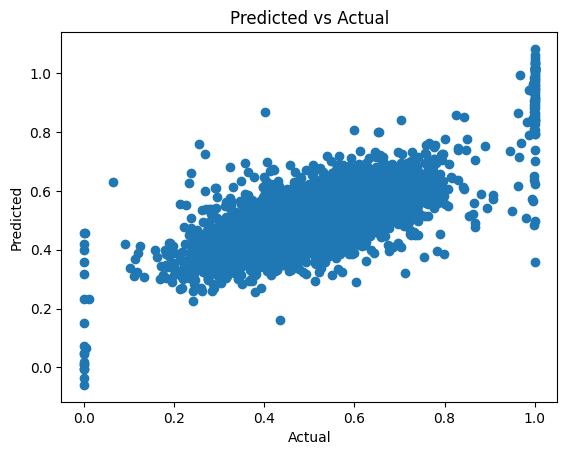

In [28]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual")
plt.show()

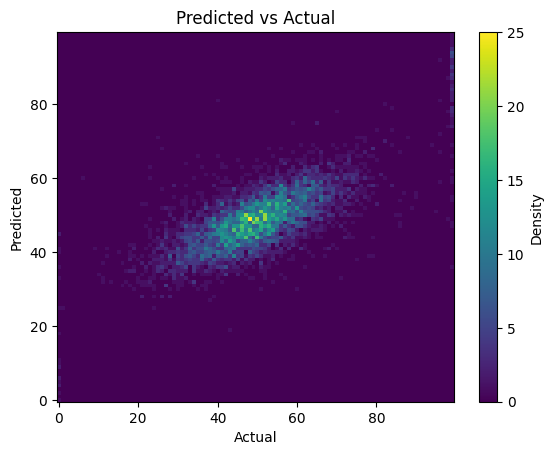

In [29]:
heatmap, xedges, yedges = np.histogram2d(y_test, y_pred, bins=100)

# Plot the heatmap
plt.imshow(heatmap.T, origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label='Density')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual")
plt.show()

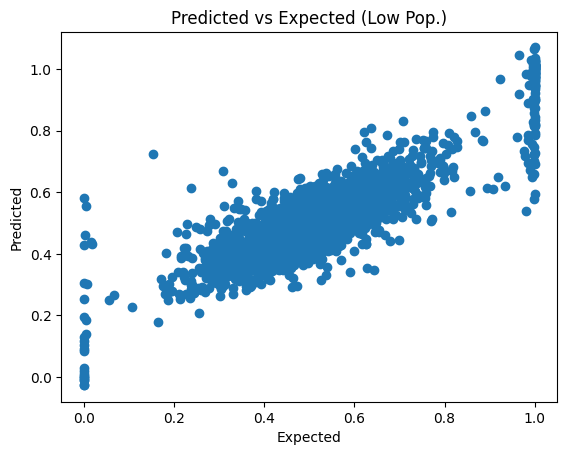

In [159]:
import matplotlib.pyplot as plt
plt.scatter(y_test1, y_pred1)
plt.xlabel("Expected")
plt.ylabel("Predicted")
plt.title("Predicted vs Expected (Low Pop.)")
ax=plt.gca()
ax.set_ylim([-0.08, 1.12])
plt.show()

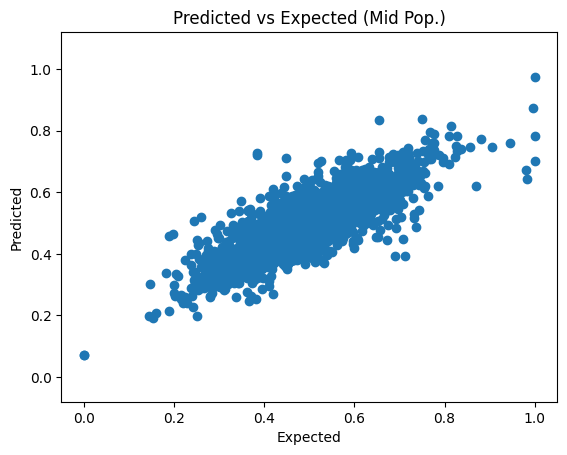

In [135]:
import matplotlib.pyplot as plt
plt.scatter(y_test2, y_pred2)
plt.xlabel("Expected")
plt.ylabel("Predicted")
plt.title("Predicted vs Expected (Mid Pop.)")
ax=plt.gca()
ax.set_ylim([-0.08, 1.12])
plt.show()

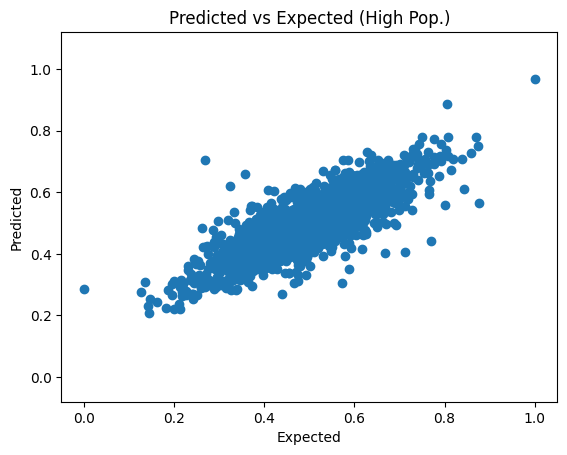

In [136]:
import matplotlib.pyplot as plt
plt.scatter(y_test3, y_pred3)
plt.xlabel("Expected")
plt.ylabel("Predicted")
plt.title("Predicted vs Expected (High Pop.)")
ax=plt.gca()
ax.set_ylim([-0.08, 1.12])
plt.show()


In [39]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd

import lightgbm as lgb

%matplotlib inline

try:
    # To enable interactive mode you should install ipywidgets
    # https://github.com/jupyter-widgets/ipywidgets
    from ipywidgets import interact, SelectMultiple

    INTERACTIVE = True
except ImportError:
    INTERACTIVE = False

In [40]:
def render_metric(metric_name):
    
    lgb.plot_metric(train_result,metric=metric_name, figsize=(10, 5),ax=lgb.plot_metric(evals_result, metric='l1-mean', figsize=(10, 5)))


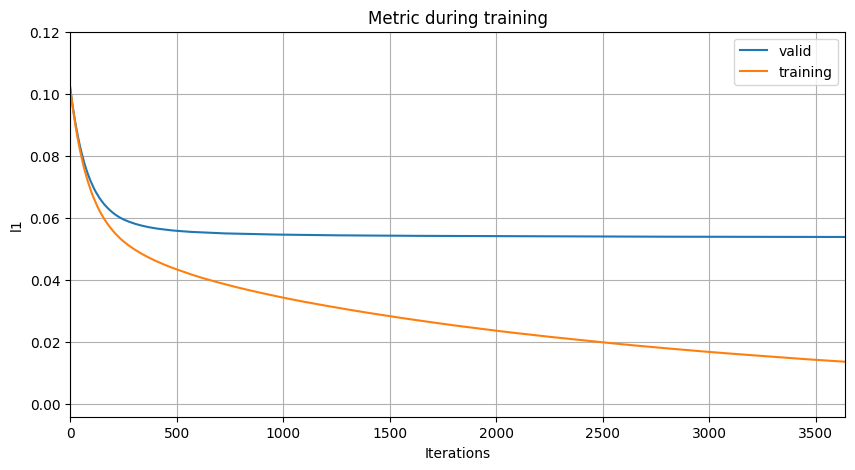

In [41]:
if INTERACTIVE:
    # create widget to switch between metrics
    interact(render_metric, metric_name=params["metric"])
else:
    render_metric(params["metric"][0])

In [42]:
def render_plot_importance(importance_type, max_features=10, ignore_zero=True, precision=3):
    lgb.plot_importance(
        model,
        importance_type=importance_type,
        max_num_features=max_features,
        ignore_zero=ignore_zero,
        figsize=(12, 8),
        precision=precision,
    )
    plt.show()

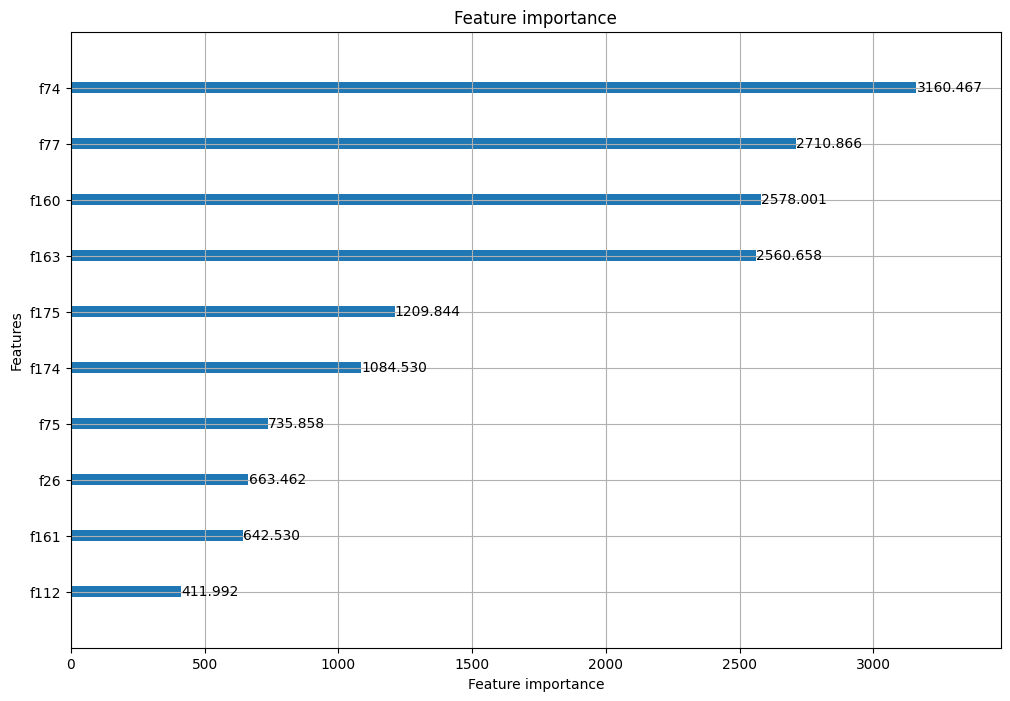

In [43]:
if INTERACTIVE:
    # create widget for interactive feature importance plot
    interact(
        render_plot_importance,
        importance_type=["split", "gain"],
        max_features=(1, train.shape[-1]),
        precision=(0, 10),
    )
else:
    render_plot_importance(importance_type="gain")

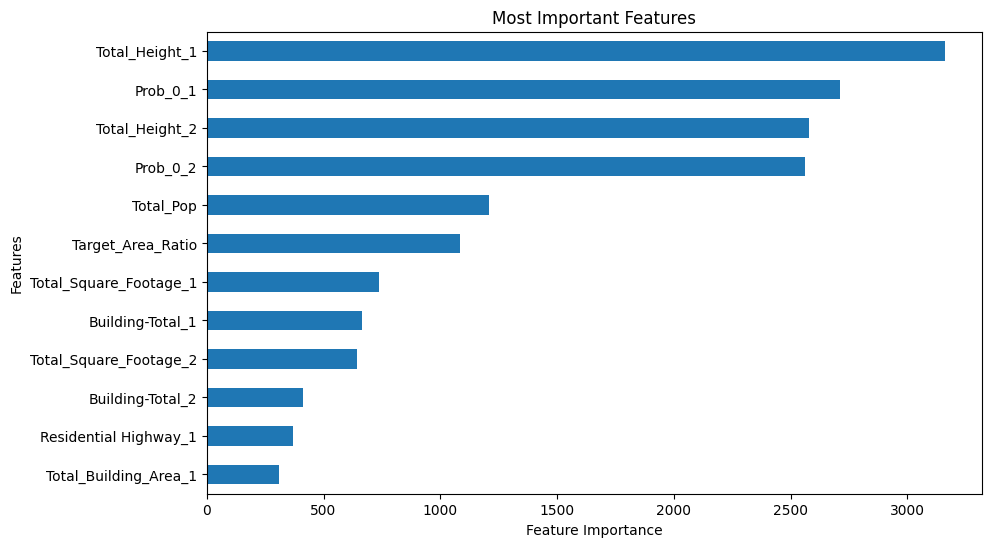

In [44]:
# Get feature importance
importance = model.feature_importance(importance_type='gain')
feature_names = combined.columns
# Create a DataFrame
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importance})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='importance')

# Plot the least important features
feature_importance_df.tail(12).plot(kind='barh', x='feature', y='importance', legend=False, figsize=(10, 6))
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Most Important Features')
plt.show()


In [34]:
combined[combined.Null_Heights_Proportion_1.isnull()]['Null_Building_Heights_1']

Series([], Name: Null_Building_Heights_1, dtype: float64)

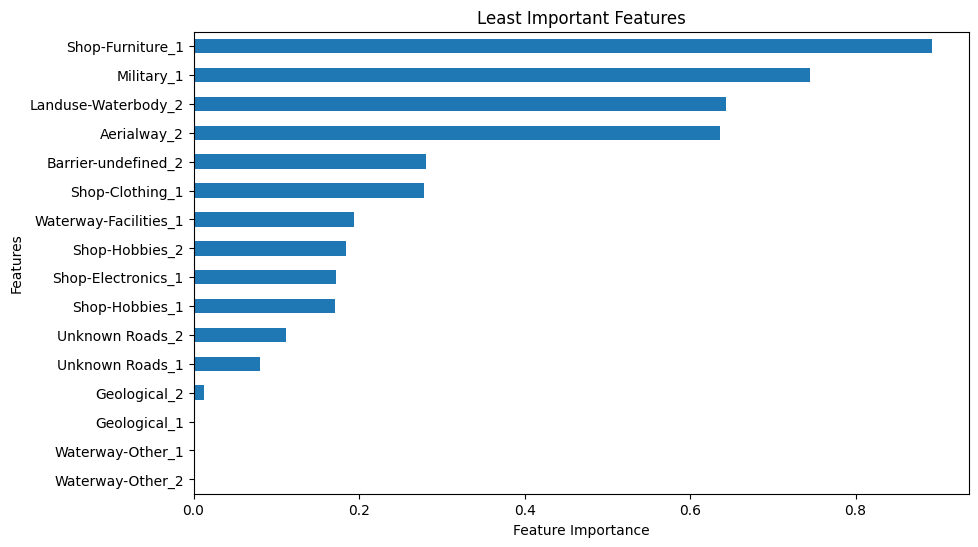

In [45]:
# Get feature importance
importance = model.feature_importance(importance_type='gain')
feature_names = combined.columns
# Create a DataFrame
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importance})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='importance')

# Plot the least important features
feature_importance_df.head(16).plot(kind='barh', x='feature', y='importance', legend=False, figsize=(10, 6))
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Least Important Features')
plt.show()

In [37]:
c=1
for i,f in feature_importance_df.sort_values(by="importance",ascending=False).iterrows():
    print(str(c)+" : "+str(f["feature"]))
    c+=1

1 : Total_Height_1
2 : Prob_0_1
3 : Total_Height_2
4 : Prob_0_2
5 : Total_Pop
6 : Target_Area_Ratio
7 : Total_Square_Footage_1
8 : Building-Total_1
9 : Total_Square_Footage_2
10 : Building-Total_2
11 : Residential Highway_1
12 : Total_Building_Area_1
13 : Residential Highway_2
14 : Total_Building_Area_2
15 : Occupied_Housing
16 : Urban
17 : Total_Area
18 : Two_Housing
19 : One_Housing
20 : Vacant_Housing
21 : Railway_Tracks_2
22 : Building-Accomodation_2
23 : Three_Housing
24 : Special Roads_1
25 : Special Roads_2
26 : Leisure_1
27 : Prob_1_1
28 : Paths_1
29 : Paths_2
30 : Leisure_2
31 : Landuse-Developed_2
32 : Man_Made_2
33 : Prob_2_2
34 : Prob_3_2
35 : Prob_1_2
36 : Prob_3_1
37 : Railway_Tracks_1
38 : Unclassified Highway_2
39 : Building-Accomodation_1
40 : Landuse-Developed_1
41 : Four_Housing
42 : Amenity-Transportation_1
43 : Five_Housing
44 : Prob_2_1
45 : Six_Housing
46 : Prob_5_1
47 : Landuse-Other_2
48 : Prob_5_2
49 : Prob_7_1
50 : Prob_7_2
51 : Man_Made_1
52 : Unclassified H

In [38]:
len(combined.columns)

186

In [20]:
bad_cols=feature_importance_df[feature_importance_df.importance<1].index

In [21]:
bad_cols_names=[]
for i in bad_cols:
    bad_cols_names.append(combined.columns[i])

In [44]:
bad_cols_names

['Waterway-Other_2',
 'Waterway-Other_1',
 'Geological_1',
 'Geological_2',
 'Unknown Roads_1',
 'Unknown Roads_2',
 'Shop-Hobbies_1',
 'Shop-Electronics_1',
 'Shop-Hobbies_2',
 'Waterway-Facilities_1',
 'Shop-Clothing_1',
 'Barrier-undefined_2',
 'Aerialway_2',
 'Landuse-Waterbody_2',
 'Military_1',
 'Shop-Furniture_1',
 'Shop-Electronics_2',
 'Waterway-Facilities_2',
 'Shop-D.I.Y._2',
 'Shop-Gifts_2',
 'Building-Sports_2',
 'Shop-Discount_2',
 'Barrier-undefined_1',
 'Landuse-Waterbody_1',
 'Aerialway_1',
 'Shop-Gifts_1',
 'Building-Power_2',
 'Shop-Health_2',
 'Amenity-Waste Management_1',
 'Military_2',
 'Shop-D.I.Y._1',
 'Shop-Furniture_2',
 'Barrier-Other_1',
 'Shop-Health_1',
 'Amenity-Waste Management_2',
 'Shop-Clothing_2',
 'Building-Sports_1',
 'Shop-Other_2',
 'Shop-Discount_1',
 'Craft_2',
 'Craft_1',
 'Waterway-Barriers_1',
 'Building-Power_1',
 'Barrier-Highway Access Control_1',
 'Place-Rural_1',
 'Building-Storage_1',
 'Building-Agricultural_1',
 'Building-Agricultural

In [22]:
combined=combined.drop(columns=bad_cols_names)